# Logistic on Titanic DS

In [6]:
import pandas as pd
import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print("Versions",mpl.__version__)
from sklearn.model_selection import train_test_split

D:\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Versions 3.0.3


In [37]:
plt.rcParams["figure.figsize"] = (12,12)

In [13]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [14]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
Train['Sex'] = Train.Sex.map({'female':0, 'male':1})
data_trainX = Train[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]
data_trainX.Age.fillna(data_trainX.Age.mean(), inplace=True)
data_trainX['Age'] = data_trainX['Age'].astype(int)
data kmsdfnsddsf= -snakfalffnnalsldsnflslnsdlflsdflknf'sadfdkndf

In [25]:
data_trainX.head(12)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22,1,0
1,2,1,0,38,1,0
2,3,3,0,26,0,0
3,4,1,0,35,1,0
4,5,3,1,35,0,0
5,6,3,1,29,0,0
6,7,1,1,54,0,0
7,8,3,1,2,3,1
8,9,3,0,27,0,2
9,10,2,0,14,1,0


In [18]:
data_trainY = Train['Survived'].values.reshape(-1,1)
data_trainY

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [19]:
X_train, X_test, y_train, y_test = train_test_split( data_trainX, data_trainY, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 6) (712, 1)
Test set: (179, 6) (179, 1)


## Preprocessing!

In [20]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MaxAbsScaler  as MS
from sklearn.preprocessing import MinMaxScaler as MMS

In [26]:
X_train_SS = SS().fit(X_train).transform(X_train)
X_train_MS = MS().fit(X_train).transform(X_train)
X_train_MMS = MMS().fit(X_train).transform(X_train)

In [29]:
X_train_SS #Standard Scalar

array([[-1.57029377,  0.83830655,  0.76303488, -0.06116579, -0.48580009,
        -0.47985198],
       [ 0.92481383, -0.34832221,  0.76303488,  2.31150783,  0.41730609,
         0.72740812],
       [ 0.61778345,  0.83830655,  0.76303488,  0.47459922,  0.41730609,
        -0.47985198],
       ...,
       [-0.02736898, -0.34832221,  0.76303488,  0.09190993, -0.48580009,
        -0.47985198],
       [-1.057281  , -1.53495097,  0.76303488,  2.0053564 , -0.48580009,
        -0.47985198],
       [-1.25937694, -0.34832221,  0.76303488,  0.16844779,  0.41730609,
        -0.47985198]])

In [30]:
X_train_MS # MIN ABS SCALAR

array([[0.04826038, 1.        , 1.        , 0.3625    , 0.        ,
        0.        ],
       [0.7687991 , 0.66666667, 1.        , 0.75      , 0.125     ,
        0.16666667],
       [0.68013468, 1.        , 1.        , 0.45      , 0.125     ,
        0.        ],
       ...,
       [0.49382716, 0.66666667, 1.        , 0.3875    , 0.        ,
        0.        ],
       [0.19640853, 0.33333333, 1.        , 0.7       , 0.        ,
        0.        ],
       [0.13804714, 0.66666667, 1.        , 0.4       , 0.125     ,
        0.        ]])

In [40]:
X_train_MMS # MIN MAX SCALAR

array([[0.04719101, 1.        , 1.        , 0.3625    , 0.        ,
        0.        ],
       [0.76853933, 0.5       , 1.        , 0.75      , 0.125     ,
        0.16666667],
       [0.67977528, 1.        , 1.        , 0.45      , 0.125     ,
        0.        ],
       ...,
       [0.49325843, 0.5       , 1.        , 0.3875    , 0.        ,
        0.        ],
       [0.19550562, 0.        , 1.        , 0.7       , 0.        ,
        0.        ],
       [0.13707865, 0.5       , 1.        , 0.4       , 0.125     ,
        0.        ]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E099F24E48>,
      dtype=object)

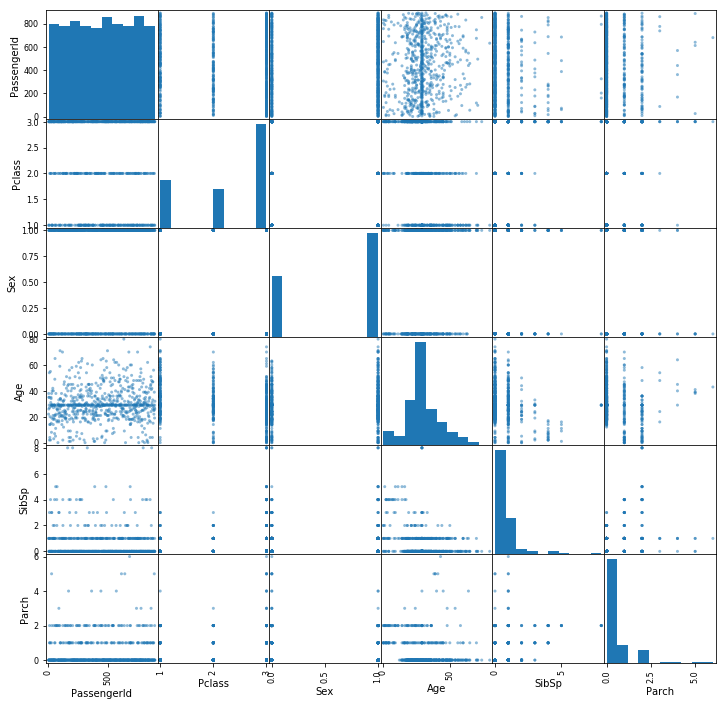

In [38]:
pd.plotting.scatter_matrix(X_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09B6EAE48>,
      dtype=object)

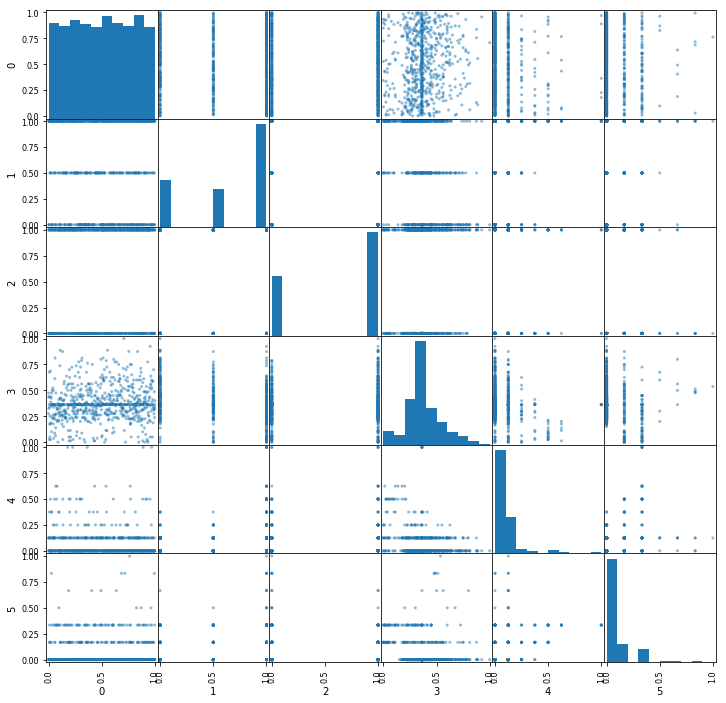

In [39]:
df_train_MMS = pd.DataFrame(X_train_MMS)
pd.plotting.scatter_matrix(df_train_MMS)

In [46]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(random_state=20) 

In [49]:
t_actual = model.fit(X_train,y_train)

t_SS = model.fit(X_train_SS,y_train)

t_MS = model.fit(X_train_MS,y_train)

t_MMS = model.fit(X_train_MMS,y_train)

In [53]:
y_hat_actual= t_actual.predict(X_test)

y_hat_SS= t_SS.predict(X_test)

y_hat_MS= t_MS.predict(X_test)

y_hat_MMS= t_MMS.predict(X_test)

'''
y_hat_actual_proba= t_actual.predict_proba(X_test)
y_hat_SS_proba= t_SS.predict_proba(X_test)
y_hat_MS_proba= t_MS.predict_proba(X_test)
y_hat_MM_probaS= t_MMS.predict_proba(X_test)
'''

In [57]:
print(jaccard_similarity_score(y_test, y_hat_actual))
print(jaccard_similarity_score(y_test, y_hat_SS))
print(jaccard_similarity_score(y_test, y_hat_MS))
print(jaccard_similarity_score(y_test, y_hat_MMS))

0.3854748603351955
0.3854748603351955
0.3854748603351955
0.3854748603351955


In [55]:
from sklearn.metrics import jaccard_similarity_score


In [4]:
!jt -t oceans16 -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T